In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.dates as mdates
import os

### Loading Stock Market Index and Plotting By Week

In [49]:
raw_dow = pd.read_csv('DOW.csv')
raw_sp500 = pd.read_csv('SP500.csv')
raw_nasdaq = pd.read_csv('NASDAQ.csv')

In [50]:
dow = raw_dow.drop(['High', 'Low', 'Open', 'Adj Close', 'Volume'], axis=1)
sp500 = raw_sp500.drop(['High', 'Low', 'Open', 'Adj Close', 'Volume'], axis=1)
nasdaq = raw_nasdaq.drop(['High', 'Low', 'Open', 'Adj Close', 'Volume'], axis=1)

In [55]:
# Filling in weekends
def fill_in(df):
    line_0314 = pd.DataFrame({"Date": "3/14/2020", "Close": df['Close'][1]}, index=[1.3])
    df = df.append(line_0314, ignore_index=False)
    line_0315 = pd.DataFrame({"Date": "3/15/2020", "Close": df['Close'][1]}, index=[1.6])
    df = df.append(line_0315, ignore_index=False)
    
    line_0321 = pd.DataFrame({"Date": "3/21/2020", "Close": df['Close'][6]}, index=[6.3])
    df = df.append(line_0321, ignore_index=False)
    line_0322 = pd.DataFrame({"Date": "3/22/2020", "Close": df['Close'][6]}, index=[6.6])
    df = df.append(line_0322, ignore_index=False)
    
    line_0328 = pd.DataFrame({"Date": "3/28/2020", "Close": df['Close'][11]}, index=[11.3])
    df = df.append(line_0328, ignore_index=False)
    line_0329 = pd.DataFrame({"Date": "3/29/2020", "Close": df['Close'][11]}, index=[11.6])
    df = df.append(line_0329, ignore_index=False)
    
    line_0404 = pd.DataFrame({"Date": "4/04/2020", "Close": df['Close'][16]}, index=[16.3])
    df = df.append(line_0404, ignore_index=False)
    line_0405 = pd.DataFrame({"Date": "4/05/2020", "Close": df['Close'][16]}, index=[16.6])
    df = df.append(line_0405, ignore_index=False)
    
    line_0410 = pd.DataFrame({"Date": "4/10/2020", "Close": df['Close'][20]}, index=[20.3])
    df = df.append(line_0410, ignore_index=False)
    line_0411 = pd.DataFrame({"Date": "4/11/2020", "Close": df['Close'][20]}, index=[20.6])
    df = df.append(line_0411, ignore_index=False)
    line_0412 = pd.DataFrame({"Date": "4/12/2020", "Close": df['Close'][20]}, index=[20.6])
    df = df.append(line_0412, ignore_index=False)
    
    line_0418 = pd.DataFrame({"Date": "4/18/2020", "Close": df['Close'][25]}, index=[25.3])
    df = df.append(line_0418, ignore_index=False)
    line_0419 = pd.DataFrame({"Date": "4/19/2020", "Close": df['Close'][25]}, index=[25.6])
    df = df.append(line_0419, ignore_index=False)
    
    line_0425 = pd.DataFrame({"Date": "4/25/2020", "Close": df['Close'][30]}, index=[30.3])
    df = df.append(line_0425, ignore_index=False)
    line_0426 = pd.DataFrame({"Date": "4/26/2020", "Close": df['Close'][30]}, index=[30.6])
    df = df.append(line_0426, ignore_index=False)
    
    df = df.sort_index().reset_index(drop=True)
    return df

In [56]:
dow = fill_in(dow)
sp500 = fill_in(sp500)
nasdaq = fill_in(nasdaq)

### Dow

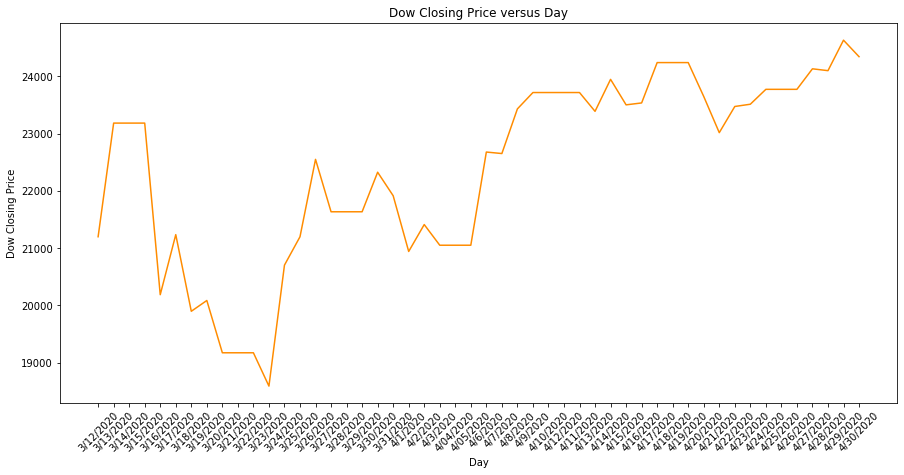

In [62]:
plt.figure(figsize = (15,7))
plt.xticks(rotation = 45)
plt.plot(dow["Date"], dow["Close"], color='darkorange')
plt.ylabel('Dow Closing Price')
plt.xlabel('Day')
plt.title('Dow Closing Price versus Day')
plt.show()


### S&P500

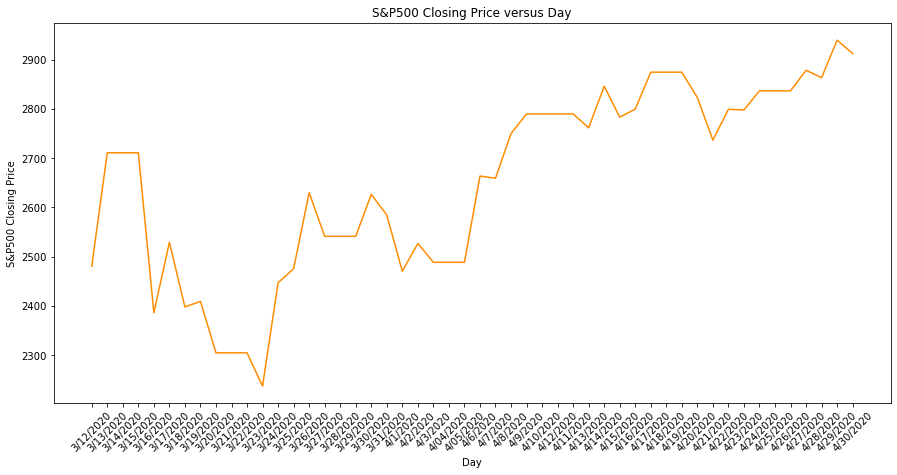

In [63]:
plt.figure(figsize = (15,7))
plt.xticks(rotation = 45)
plt.plot(sp500["Date"], sp500["Close"], color='darkorange')
plt.ylabel('S&P500 Closing Price')
plt.xlabel('Day')
plt.title('S&P500 Closing Price versus Day')
plt.show()

### NASDAQ

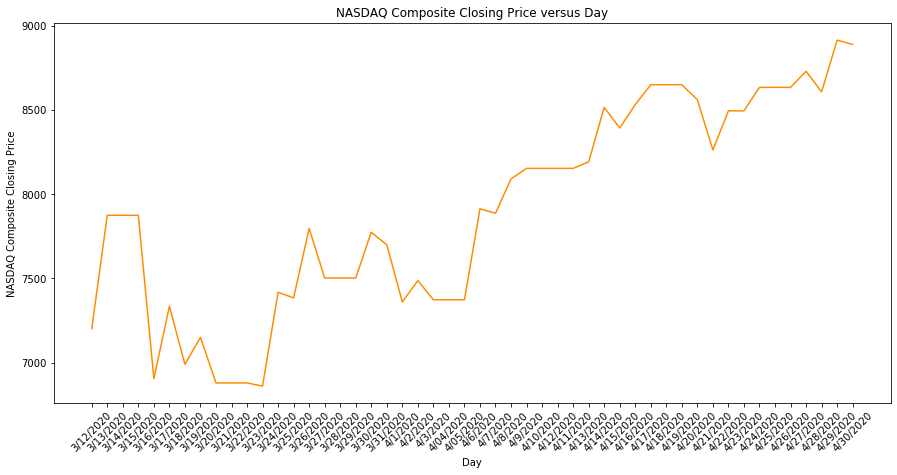

In [64]:
plt.figure(figsize = (15,7))
plt.xticks(rotation = 45)
plt.plot(nasdaq["Date"], nasdaq["Close"], color='darkorange')
plt.ylabel('NASDAQ Composite Closing Price')
plt.xlabel('Day')
plt.title('NASDAQ Composite Closing Price versus Day')
plt.show()


### Sentiment Analysis of Tweets

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


C:\Users\jerem\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [9]:
analyzer = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    return score["compound"]

### Example of a Negative Tweet (compound score is negative)

In [10]:
sentiment_analyzer_scores('Head nurse Cai Liping of Wuchang Hospital died of #coronavirus infection in Wuhan. When the van transporting her body drove away, a man tried to grab the van and see her one last time. Thats her husband, a doctor working for the same hospital. ')

-0.5574

### Example of a Positive Tweet (compound score is positive)

In [11]:
sentiment_analyzer_scores('The worlds most comprehensive site addressing all aspects of novel coranavirus (COVID-19) is now up and running: http://www.cidrap.umn.edu/covid-19 @CIDRAP @UMNresearch')

0.5563

### Example of processing data from daily Tweet file

In [12]:
def loop_through_day_tweets(day):
    score = 0
    for tweet in day['text']:
        score += sentiment_analyzer_scores(tweet)
    return score

In [13]:
raw_day1 = pd.read_csv('Tweets/2020-03-12 Coronavirus Tweets.CSV')


In [14]:
day1 = raw_day1.drop(['screen_name', 'source', 'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name', 'is_quote', 'is_retweet', 'favourites_count', 'retweet_count', 'country_code', 'place_full_name', 'place_type', 'followers_count', 'friends_count', 'account_lang', 'account_created_at', 'verified', 'created_at', 'status_id', 'user_id'], axis=1)
day1_cleaned = day1.loc[day1['lang'] == "en"]
total_day1 = len(day1_cleaned)
sentiment_day1 = loop_through_day_tweets(day1_cleaned)

In [15]:
loop_through_day_tweets(day1_cleaned)

2437.012299999801

### Loop through all CSV files and perform analysis

In [81]:
def analyze_all_days(filelist):
    df = pd.DataFrame(columns=['file', 'score'])
    for i in range(len(filelist)):
        # Read and clean
        raw_day = pd.read_csv('Tweets/' + filelist[i])
        day = raw_day.drop(['screen_name', 'source', 'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name', 'is_quote', 'is_retweet', 'favourites_count', 'retweet_count', 'country_code', 'place_full_name', 'place_type', 'followers_count', 'friends_count', 'account_lang', 'account_created_at', 'verified', 'created_at', 'status_id', 'user_id'], axis=1)
        day_cleaned = day.loc[day['lang'] == "en"]
        sentiment_day = loop_through_day_tweets(day_cleaned)
        total_day = len(day_cleaned)
        
        # Append to data frame
        df.loc[i] = [filelist[i], sentiment_day/total_day]
    
    return df
        

In [82]:
filelist = os.listdir("Tweets")
sentiment_scores = analyze_all_days(filelist)


In [83]:
sentiment_scores

,file,score
0,2020-03-12 Coronavirus Tweets.CSV,0.009129
1,2020-03-13 Coronavirus Tweets.CSV,0.034055
2,2020-03-14 Coronavirus Tweets.CSV,0.059821
3,2020-03-15 Coronavirus Tweets.CSV,0.052909
4,2020-03-16 Coronavirus Tweets.CSV,0.062216
5,2020-03-17 Coronavirus Tweets.CSV,0.071067
6,2020-03-18 Coronavirus Tweets.CSV,0.056625
7,2020-03-19 Coronavirus Tweets.CSV,0.067604
8,2020-03-20 Coronavirus Tweets.CSV,0.074718
9,2020-03-21 Coronavirus Tweets.CSV,0.087697


In [117]:
daily_sentiment = pd.concat([normal_dow, data], axis=1)
daily_sentiment = daily_sentiment.drop(['Close', 'file'], axis=1)

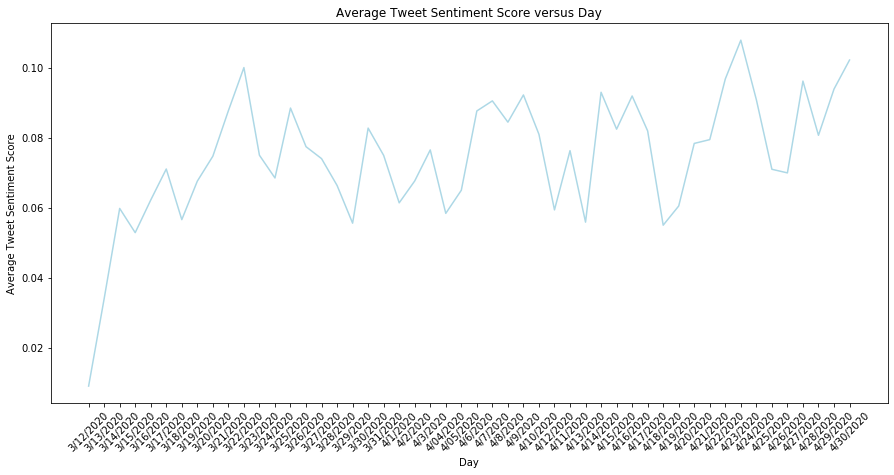

In [120]:
plt.figure(figsize = (15,7))
plt.xticks(rotation = 45)
plt.plot(daily_sentiment["Date"], daily_sentiment["score"], color='lightblue')
plt.ylabel('Average Tweet Sentiment Score')
plt.xlabel('Day')
plt.title('Average Tweet Sentiment Score versus Day')
plt.show()

### Linear regression

In [84]:
data = sentiment_scores
sentiment = data['score']


In [85]:
dow_close = dow['Close']

In [86]:
sp500_close = sp500['Close']

In [87]:
nasdaq_close = nasdaq['Close']

### Dow

p-values: 0.13972463308999897
R^2: 0.04487319773132123
Slope: 19366.530389048025


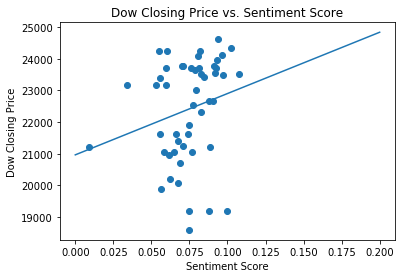

In [88]:
# Linear regression using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(sentiment, dow_close)
predictions = np.linspace(0,0.2,40) * slope + intercept
print(f'p-values: {p_value}')
print(f'R^2: {r_value*r_value}')
print(f'Slope: {slope}')

# Plot Results
plt.scatter(sentiment, dow_close)
plt.plot(np.linspace(0,0.2,40), predictions)
plt.xlabel('Sentiment Score')
plt.ylabel('Dow Closing Price')
plt.title('Dow Closing Price vs. Sentiment Score')
plt.show()

### SP500

p-values: 0.06868556114182187
R^2: 0.0673857206519471
Slope: 2767.8720301441303


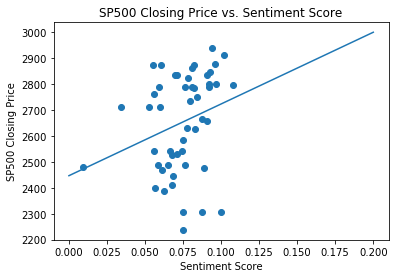

In [89]:
# Linear regression using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(sentiment, sp500_close)
predictions = np.linspace(0,0.2,40) * slope + intercept
print(f'p-values: {p_value}')
print(f'R^2: {r_value*r_value}')
print(f'Slope: {slope}')

# Plot Results
plt.scatter(sentiment, sp500_close)
plt.plot(np.linspace(0,0.2,40), predictions)
plt.xlabel('Sentiment Score')
plt.ylabel('SP500 Closing Price')
plt.title('SP500 Closing Price vs. Sentiment Score')
plt.show()

### NASDAQ

p-values: 0.013248091009335442
R^2: 0.12115817152002392
Slope: 12105.706217976827


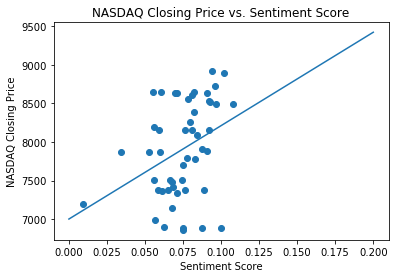

In [90]:
# Linear regression using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(sentiment, nasdaq_close)
predictions = np.linspace(0,0.2,40) * slope + intercept
print(f'p-values: {p_value}')
print(f'R^2: {r_value*r_value}')
print(f'Slope: {slope}')

# Plot Results
plt.scatter(sentiment, nasdaq_close)
plt.plot(np.linspace(0,0.2,40), predictions)
plt.xlabel('Sentiment Score')
plt.ylabel('NASDAQ Closing Price')
plt.title('NASDAQ Closing Price vs. Sentiment Score')
plt.show()

In [100]:
### Normalizing stock and sentiment data for plotting
def normalize_index(df):
    normal_df = pd.DataFrame(columns=['Date', 'Close'])
    high = max(df['Close'])
    low = min(df['Close'])
    for index, row in df.iterrows():
        normal_df.loc[index] = [row['Date'], normalize(row['Close'], high, low)]
    return normal_df
        
def normalize_sentiment(df):
    normal_df = pd.DataFrame(columns=['score'])
    high = max(df['score'])
    low = min(df['score'])
    for index, row in df.iterrows():
        normal_df.loc[index] = [normalize(row['score'], high, low)]
    return normal_df

def normalize(value, max, min):
    return (value - min) / (max - min)
        

In [103]:
normal_sentiment = normalize_sentiment(data)
normal_dow = normalize_index(dow)
normal_sp500 = normalize_index(sp500)
normal_nasdaq = normalize_index(nasdaq)

In [108]:
dow_merged = pd.concat([normal_dow, normal_sentiment], axis=1)
sp500_merged = pd.concat([normal_sp500, normal_sentiment], axis=1)
nasdaq_merged = pd.concat([normal_nasdaq, normal_sentiment], axis=1)

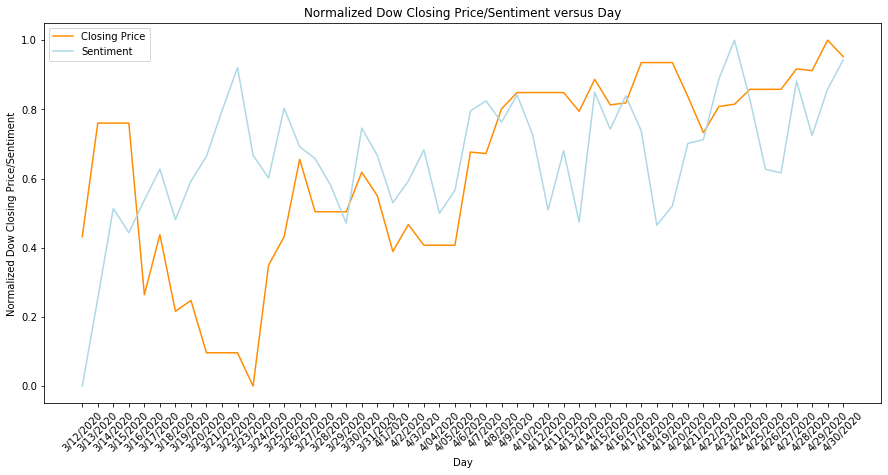

In [122]:
plt.figure(figsize = (15,7))
plt.xticks(rotation = 45)
plt.plot(dow_merged["Date"], dow_merged["Close"], color='darkorange', label='Closing Price')
plt.plot(dow_merged["Date"], dow_merged["score"], color='lightblue', label='Sentiment')
plt.ylabel('Normalized Dow Closing Price/Sentiment')
plt.xlabel('Day')
plt.title('Normalized Dow Closing Price/Sentiment versus Day')
plt.legend()
plt.show()


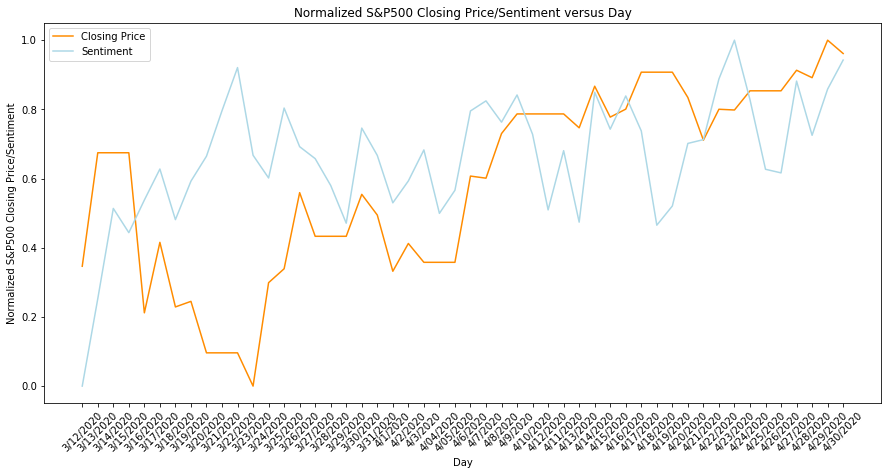

In [123]:
plt.figure(figsize = (15,7))
plt.xticks(rotation = 45)
plt.plot(sp500_merged["Date"], sp500_merged["Close"], color='darkorange', label='Closing Price')
plt.plot(sp500_merged["Date"], sp500_merged["score"], color='lightblue', label='Sentiment')
plt.ylabel('Normalized S&P500 Closing Price/Sentiment')
plt.xlabel('Day')
plt.title('Normalized S&P500 Closing Price/Sentiment versus Day')
plt.legend()
plt.show()

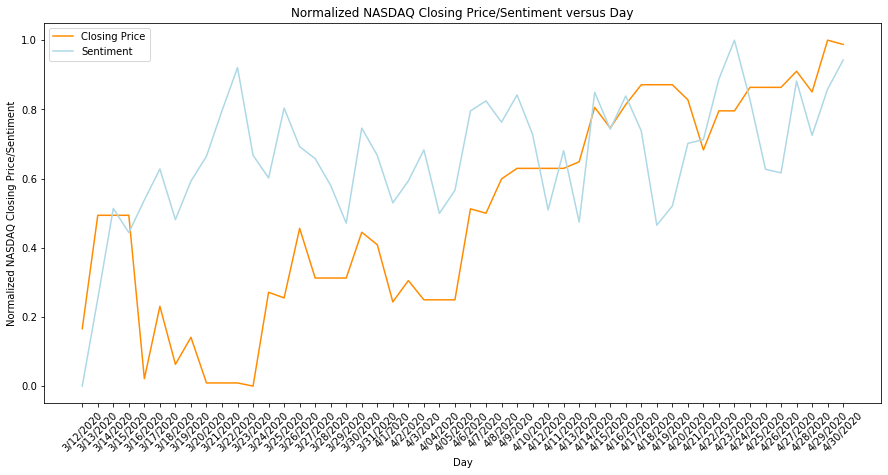

In [124]:
plt.figure(figsize = (15,7))
plt.xticks(rotation = 45)
plt.plot(nasdaq_merged["Date"], nasdaq_merged["Close"], color='darkorange', label='Closing Price')
plt.plot(nasdaq_merged["Date"], nasdaq_merged["score"], color='lightblue', label='Sentiment')
plt.ylabel('Normalized NASDAQ Closing Price/Sentiment')
plt.xlabel('Day')
plt.title('Normalized NASDAQ Closing Price/Sentiment versus Day')
plt.legend()
plt.show()